In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/Sample Submission.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/test_data.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_data.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_labels.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/fitness_values_2.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/_DS_Store


In [2]:
train = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_data.csv')
test = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/test_data.csv')
labels = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_labels.csv')
s = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/Sample Submission.csv')

In [3]:
train.head()

,patient_id,event_name,event_time,specialty,plan_type,patient_payment
0,patient_1,event_1,47,spec_1,plan_1,0.0
1,patient_4,event_1,727,spec_1,plan_2,0.0
2,patient_6,event_1,738,spec_1,plan_1,0.0
3,patient_7,event_1,923,spec_1,plan_1,0.0
4,patient_9,event_1,49,spec_1,plan_1,0.0


In [4]:
# ftns
test['event_name'].nunique()

520

In [5]:
imp_events=train['event_name'].value_counts().keys()
imp_speciality=train['specialty'].value_counts().keys()

In [6]:
id_var = 'patient_id'
time_var='event_time'

In [7]:

train[train.patient_id=='patient_12']

,patient_id,event_name,event_time,specialty,plan_type,patient_payment
7,patient_12,event_1,975,spec_1,plan_1,0.00
1745,patient_12,event_1,887,spec_1,plan_1,0.00
1822,patient_12,event_8,975,spec_1,plan_1,0.00
3672,patient_12,event_2,871,spec_1,plan_1,0.00
4937,patient_12,event_1,484,spec_1,plan_1,0.00
...,...,...,...,...,...,...
14417405,patient_12,event_520,826,spec_11,plan_5,1.15
14421072,patient_12,event_495,1023,spec_3,plan_5,1.10
14421465,patient_12,event_498,991,spec_50,plan_5,1.50
14437212,patient_12,event_520,1019,spec_11,plan_5,1.10


In [8]:
train[train.patient_id=='patient_23830']

,patient_id,event_name,event_time,specialty,plan_type,patient_payment
11639369,patient_23830,event_439,1030,spec_66,plan_6,0.0
12462444,patient_23830,event_439,1078,spec_66,plan_6,0.0
12765089,patient_23830,event_439,1052,spec_66,plan_6,0.0


In [9]:
labels[labels.outcome_flag==1],labels[labels.outcome_flag==0]

(          patient_id  outcome_flag
 5         patient_10             1
 7         patient_12             1
 18        patient_26             1
 22        patient_30             1
 28        patient_37             1
 ...              ...           ...
 16639  patient_23771             1
 16644  patient_23777             1
 16651  patient_23789             1
 16659  patient_23800             1
 16665  patient_23808             1
 
 [2447 rows x 2 columns],           patient_id  outcome_flag
 0          patient_1             0
 1          patient_4             0
 2          patient_6             0
 3          patient_7             0
 4          patient_9             0
 ...              ...           ...
 16678  patient_23827             0
 16679  patient_23828             0
 16680  patient_23829             0
 16681  patient_23830             0
 16682  patient_23831             0
 
 [14236 rows x 2 columns])

In [10]:
c=['count','nunique']
n=['mean','max','min','sum','median', 'std']

t1=train.groupby('event_name').agg({'patient_id':['count'],'event_time':n,'specialty':['count'],'plan_type':['count'],'patient_payment':['sum','std']})
t1.columns=['E_' + '_'.join(col).strip() for col in t1.columns.values]
t1.reset_index(inplace=True)
t1

tt1=test.groupby('event_name').agg({'patient_id':['count'],'event_time':n,'specialty':['count'],'plan_type':['count'],'patient_payment':['sum','std']})
tt1.columns=['E_' + '_'.join(col).strip() for col in tt1.columns.values]
tt1.reset_index(inplace=True)
tt1

,event_name,E_patient_id_count,E_event_time_mean,E_event_time_max,E_event_time_min,E_event_time_sum,E_event_time_median,E_event_time_std,E_specialty_count,E_plan_type_count,E_patient_payment_sum,E_patient_payment_std
0,event_1,35386,508.019047,1080,1,17976762,486.0,312.038898,35386,35386,201575.490000,29.961209
1,event_10,8244,544.996967,1080,1,4492955,549.0,312.990301,8244,8244,54011.040000,26.989017
2,event_100,695,494.568345,1079,4,343725,520.0,322.938343,695,695,6500.000000,88.813899
3,event_101,57832,507.665739,1080,1,29359325,485.0,312.057165,57832,57832,206518.540000,31.561768
4,event_102,6182,395.036558,1080,1,2442116,349.0,288.447061,6182,6182,30345.220000,50.115567
...,...,...,...,...,...,...,...,...,...,...,...,...
515,event_95,12309,475.653018,1080,1,5854813,438.0,318.712752,12309,12309,50673.950000,33.421513
516,event_96,3427,524.529910,1080,1,1797564,512.0,313.934419,3427,3427,63717.315156,29.248470
517,event_97,20062,545.829030,1080,1,10950422,549.0,310.624207,20062,20062,75510.450034,4.936368
518,event_98,7758,482.225316,1080,1,3741104,475.0,303.691153,7758,7758,37941.620000,38.558530


In [11]:
t2=train.groupby(['patient_id','event_name']).agg({'event_time':n,'specialty':['count'],'plan_type':['count'],'patient_payment':['sum','std']})
t2.columns=['PE_' + '_'.join(col).strip() for col in t2.columns.values]
t2.reset_index(inplace=True)
t2


tt2=test.groupby(['patient_id','event_name']).agg({'event_time':n,'specialty':['count'],'plan_type':['count'],'patient_payment':['sum','std']})
tt2.columns=['PE_' + '_'.join(col).strip() for col in tt2.columns.values]
tt2.reset_index(inplace=True)
tt2

,patient_id,event_name,PE_event_time_mean,PE_event_time_max,PE_event_time_min,PE_event_time_sum,PE_event_time_median,PE_event_time_std,PE_specialty_count,PE_plan_type_count,PE_patient_payment_sum,PE_patient_payment_std
0,patient_10002,event_101,937.000000,937,937,937,937.0,NaN,1,1,15.000000,NaN
1,patient_10002,event_105,745.615385,939,139,19386,923.5,338.925842,26,26,228.000000,15.990767
2,patient_10002,event_108,1037.095238,1038,1037,21779,1037.0,0.300793,21,21,0.000000,0.000000
3,patient_10002,event_114,1037.000000,1037,1037,1037,1037.0,NaN,1,1,0.000000,NaN
4,patient_10002,event_12,459.600000,981,118,6894,358.0,310.960218,15,15,105.000000,13.469542
...,...,...,...,...,...,...,...,...,...,...,...,...
429260,patient_9998,event_485,717.000000,717,717,717,717.0,NaN,1,1,0.000000,NaN
429261,patient_9998,event_488,208.000000,239,177,832,208.0,26.595739,4,4,19.642857,0.892857
429262,patient_9998,event_68,239.000000,239,239,239,239.0,NaN,1,1,0.000000,NaN
429263,patient_9998,event_8,52.000000,52,52,416,52.0,0.000000,8,8,10.000000,2.314550


In [12]:
train=train.merge(t1,on=['event_name'],how='left')
print(1)
train=train.merge(t2,on=['patient_id','event_name'],how='left')
del t1,t2

1


In [13]:
test=test.merge(tt1,on=['event_name'],how='left')
print(1)
test=test.merge(tt2,on=['patient_id','event_name'],how='left')
del tt1,tt2

1


In [14]:
train.columns

Index(['patient_id', 'event_name', 'event_time', 'specialty', 'plan_type',
       'patient_payment', 'E_patient_id_count', 'E_event_time_mean',
       'E_event_time_max', 'E_event_time_min', 'E_event_time_sum',
       'E_event_time_median', 'E_event_time_std', 'E_specialty_count',
       'E_plan_type_count', 'E_patient_payment_sum', 'E_patient_payment_std',
       'PE_event_time_mean', 'PE_event_time_max', 'PE_event_time_min',
       'PE_event_time_sum', 'PE_event_time_median', 'PE_event_time_std',
       'PE_specialty_count', 'PE_plan_type_count', 'PE_patient_payment_sum',
       'PE_patient_payment_std'],
      dtype='object')

In [15]:
cl=[x for x in train.columns if x not in ['patient_id', 'event_name', 'event_time', 'specialty', 'plan_type','patient_payment']]

In [16]:
agg_col={'event_name':c,'event_time':n,'specialty':c,'plan_type':['count'],'patient_payment':n}
for k in cl:
    agg_col[k]=n

In [17]:
agg_col

{'event_name': ['count', 'nunique'],
 'event_time': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'specialty': ['count', 'nunique'],
 'plan_type': ['count'],
 'patient_payment': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_patient_id_count': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_event_time_mean': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_event_time_max': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_event_time_min': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_event_time_sum': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_event_time_median': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_event_time_std': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_specialty_count': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_plan_type_count': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_patient_payment_sum': ['mean', 'max', 'min', 'sum', 'median', 'std'],
 'E_patient_payment_std': ['mean', 'max', 'min', 'sum', 'median', 's

In [18]:


train1=train.groupby('patient_id').agg(agg_col)
train1.columns=['P_' + '_'.join(col).strip() for col in train1.columns.values]
train1.reset_index(inplace=True)
train1.head()

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,...,P_PE_patient_payment_sum_min,P_PE_patient_payment_sum_sum,P_PE_patient_payment_sum_median,P_PE_patient_payment_sum_std,P_PE_patient_payment_std_mean,P_PE_patient_payment_std_max,P_PE_patient_payment_std_min,P_PE_patient_payment_std_sum,P_PE_patient_payment_std_median,P_PE_patient_payment_std_std
0,patient_1,1537,75,485.363045,1079,12,746003,476.0,306.909565,1537,...,0.0,1764.160714,0.00,5.306832,0.103649,11.519115,0.0,158.064106,0.000000,0.713838
1,patient_10,2306,98,469.333478,1079,2,1082283,482.0,275.963598,2306,...,0.0,828838.252500,360.00,304.364049,14.089581,194.454365,0.0,32293.320501,13.630549,13.192232
2,patient_100,1659,67,593.030741,1077,6,983838,642.0,290.552103,1659,...,0.0,5829.948643,0.00,12.744573,0.196875,9.956196,0.0,324.449195,0.000000,0.758619
3,patient_1000,1572,88,464.208651,1079,9,729736,446.0,256.697896,1572,...,0.0,218944.924615,88.00,137.830925,10.761105,176.776695,0.0,16744.278633,5.298129,12.502058
4,patient_10000,903,71,574.370986,1079,11,518657,624.0,328.552028,903,...,0.0,12138.738571,4.05,17.234567,1.673393,17.320508,0.0,1490.993430,0.849057,2.731435


In [19]:

test1=test.groupby('patient_id').agg(agg_col)
test1.columns=['P_' + '_'.join(col).strip() for col in test1.columns.values]
test1.reset_index(inplace=True)
test1.head()

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,...,P_PE_patient_payment_sum_min,P_PE_patient_payment_sum_sum,P_PE_patient_payment_sum_median,P_PE_patient_payment_sum_std,P_PE_patient_payment_std_mean,P_PE_patient_payment_std_max,P_PE_patient_payment_std_min,P_PE_patient_payment_std_sum,P_PE_patient_payment_std_median,P_PE_patient_payment_std_std
0,patient_10002,1045,63,630.802871,1078,7,659189,645.0,335.398121,1045,...,0.0,331575.460379,170.00,450.403249,10.840141,165.000000,0.0,11208.706296,9.412601,13.331346
1,patient_10003,812,87,572.399015,1074,2,464788,588.0,321.167681,812,...,0.0,16945.556905,0.00,62.057396,3.234287,89.462939,0.0,2555.086706,0.000000,11.862682
2,patient_10004,600,51,504.281667,1079,7,302569,494.0,284.266714,600,...,0.0,94470.967308,15.00,432.187344,14.752783,219.891965,0.0,8748.400201,1.897396,51.462836
3,patient_10006,563,51,601.658970,1051,6,338734,607.0,247.193970,563,...,0.0,55488.371429,50.00,84.799075,6.937713,35.355339,0.0,3787.991112,7.350807,5.875952
4,patient_10011,372,37,551.448925,1063,7,205139,572.0,303.393778,372,...,0.0,86585.206667,142.04,226.279936,10.284882,24.748737,0.0,3723.127324,12.551783,8.009788


In [20]:
labels = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_labels.csv')

In [21]:
train1=train1.merge(labels,on=['patient_id'])
train1.head()

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,...,P_PE_patient_payment_sum_sum,P_PE_patient_payment_sum_median,P_PE_patient_payment_sum_std,P_PE_patient_payment_std_mean,P_PE_patient_payment_std_max,P_PE_patient_payment_std_min,P_PE_patient_payment_std_sum,P_PE_patient_payment_std_median,P_PE_patient_payment_std_std,outcome_flag
0,patient_1,1537,75,485.363045,1079,12,746003,476.0,306.909565,1537,...,1764.160714,0.00,5.306832,0.103649,11.519115,0.0,158.064106,0.000000,0.713838,0
1,patient_10,2306,98,469.333478,1079,2,1082283,482.0,275.963598,2306,...,828838.252500,360.00,304.364049,14.089581,194.454365,0.0,32293.320501,13.630549,13.192232,1
2,patient_100,1659,67,593.030741,1077,6,983838,642.0,290.552103,1659,...,5829.948643,0.00,12.744573,0.196875,9.956196,0.0,324.449195,0.000000,0.758619,0
3,patient_1000,1572,88,464.208651,1079,9,729736,446.0,256.697896,1572,...,218944.924615,88.00,137.830925,10.761105,176.776695,0.0,16744.278633,5.298129,12.502058,0
4,patient_10000,903,71,574.370986,1079,11,518657,624.0,328.552028,903,...,12138.738571,4.05,17.234567,1.673393,17.320508,0.0,1490.993430,0.849057,2.731435,0


In [22]:
train1[train1.outcome_flag==1]

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,...,P_PE_patient_payment_sum_sum,P_PE_patient_payment_sum_median,P_PE_patient_payment_sum_std,P_PE_patient_payment_std_mean,P_PE_patient_payment_std_max,P_PE_patient_payment_std_min,P_PE_patient_payment_std_sum,P_PE_patient_payment_std_median,P_PE_patient_payment_std_std,outcome_flag
1,patient_10,2306,98,469.333478,1079,2,1082283,482.0,275.963598,2306,...,828838.252500,360.000000,304.364049,14.089581,194.454365,0.0,32293.320501,13.630549,13.192232,1
5,patient_10001,474,49,515.225738,1056,2,244217,519.0,304.604755,474,...,161985.483738,329.782262,259.217227,14.685125,52.924670,0.0,6755.157349,14.288690,8.405623,1
12,patient_10012,509,51,414.614931,1056,1,211039,393.0,296.198043,509,...,81003.692158,80.000000,237.462586,16.731004,144.970246,0.0,8382.233180,13.693064,22.258745,1
13,patient_10013,122,27,440.770492,1027,8,53774,474.0,255.484462,122,...,72497.678571,0.000000,903.416332,5.975023,17.320508,0.0,675.177630,0.000000,7.148762,1
18,patient_10021,421,42,540.888361,1078,16,227714,555.0,322.722753,421,...,33689.077143,0.000000,161.422908,1.560776,22.287061,0.0,647.721835,0.000000,4.264394,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,patient_9962,404,54,655.133663,1075,1,264674,624.0,329.186827,404,...,94129.528846,120.000000,226.608637,13.485560,42.426407,0.0,5205.426334,16.581232,10.907292,1
16660,patient_9967,1281,96,505.905543,1080,2,648065,444.0,328.308700,1281,...,164774.802381,90.000000,116.695344,6.452120,34.591887,0.0,8168.383319,5.223569,4.900952,1
16663,patient_9971,1059,73,466.977337,1078,2,494529,459.0,260.833518,1059,...,202688.813275,65.000000,232.364140,4.343368,12.909944,0.0,4551.849591,3.582489,3.769690,1
16673,patient_9986,671,49,459.199702,1065,2,308123,389.0,240.802474,671,...,64866.070415,40.000000,161.044633,6.101395,70.710678,0.0,4014.717987,4.750731,9.913560,1


In [23]:
train1[train1.outcome_flag==0]

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,...,P_PE_patient_payment_sum_sum,P_PE_patient_payment_sum_median,P_PE_patient_payment_sum_std,P_PE_patient_payment_std_mean,P_PE_patient_payment_std_max,P_PE_patient_payment_std_min,P_PE_patient_payment_std_sum,P_PE_patient_payment_std_median,P_PE_patient_payment_std_std,outcome_flag
0,patient_1,1537,75,485.363045,1079,12,746003,476.0,306.909565,1537,...,1764.160714,0.00,5.306832,0.103649,11.519115,0.0,158.064106,0.000000,0.713838,0
2,patient_100,1659,67,593.030741,1077,6,983838,642.0,290.552103,1659,...,5829.948643,0.00,12.744573,0.196875,9.956196,0.0,324.449195,0.000000,0.758619,0
3,patient_1000,1572,88,464.208651,1079,9,729736,446.0,256.697896,1572,...,218944.924615,88.00,137.830925,10.761105,176.776695,0.0,16744.278633,5.298129,12.502058,0
4,patient_10000,903,71,574.370986,1079,11,518657,624.0,328.552028,903,...,12138.738571,4.05,17.234567,1.673393,17.320508,0.0,1490.993430,0.849057,2.731435,0
6,patient_10005,619,89,446.861066,1080,1,276607,379.0,345.431539,619,...,80438.310476,0.00,634.077677,14.595487,370.865046,0.0,8757.292310,0.000000,66.527839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678,patient_9994,822,63,535.251825,1080,8,439977,543.0,267.447498,822,...,195350.061485,115.00,417.067571,7.053651,23.651932,0.0,5727.564781,6.427361,5.605631,0
16679,patient_9995,1007,72,605.998014,1080,7,610240,607.0,333.835706,1007,...,470175.038029,325.30,516.959419,16.326159,52.951967,0.0,16277.180491,16.680072,10.634743,0
16680,patient_9996,1253,87,405.390263,1080,16,507954,261.0,327.419168,1253,...,53618.888809,0.00,258.723061,1.405839,50.451733,0.0,1729.182487,0.000000,7.701886,0
16681,patient_9997,640,64,545.739063,1080,3,349273,542.0,288.160594,640,...,444448.661429,50.00,1539.438694,24.370380,158.117238,0.0,15231.487683,4.901325,48.242618,0


In [24]:
df=train1.append(test1,ignore_index=True)
df.head()
# del train,test

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,P_E_event_time_max_max,P_E_event_time_max_mean,P_E_event_time_max_median,P_E_event_time_max_min,P_E_event_time_max_std,P_E_event_time_max_sum,P_E_event_time_mean_max,P_E_event_time_mean_mean,P_E_event_time_mean_median,P_E_event_time_mean_min,...,P_patient_payment_mean,P_patient_payment_median,P_patient_payment_min,P_patient_payment_std,P_patient_payment_sum,P_plan_type_count,P_specialty_count,P_specialty_nunique,outcome_flag,patient_id
0,1080,1079.996747,1080,1079,0.056962,1659955,555.080542,495.221064,502.429877,400.518740,...,0.207534,0.0,0.0,1.242669,318.979048,1537,1537,9,0.0,patient_1
1,1080,1079.999133,1080,1079,0.029444,2490478,555.080542,487.838566,502.380754,393.312069,...,4.729580,0.0,0.0,19.868559,10906.412500,2306,2306,17,1.0,patient_10
2,1080,1079.997589,1080,1079,0.049058,1791716,550.704551,505.027779,509.024369,430.299815,...,0.306175,0.0,0.0,5.551968,507.944746,1659,1659,8,0.0,patient_100
3,1080,1079.911578,1080,1076,0.518720,1697621,631.354230,486.648550,496.984305,301.878184,...,4.037030,0.0,0.0,17.351994,6346.211612,1572,1572,14,0.0,patient_1000
4,1080,1079.998893,1080,1079,0.033278,975239,554.073741,502.652964,502.654529,365.135652,...,0.580368,0.0,0.0,3.375075,524.071905,903,903,12,0.0,patient_10000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23831 entries, 0 to 23830
Columns: 145 entries, P_E_event_time_max_max to patient_id
dtypes: float64(101), int64(43), object(1)
memory usage: 26.4+ MB


In [26]:
df_train=df[df['outcome_flag'].isnull()==False].copy()
df_test=df[df['outcome_flag'].isnull()==True].copy()

print(df_train.shape,df_test.shape)
# del df

(16683, 145) (7148, 145)


In [27]:
print(labels.outcome_flag.value_counts(normalize=True))
labels[labels.outcome_flag==1]

0    0.853324
1    0.146676
Name: outcome_flag, dtype: float64


,patient_id,outcome_flag
5,patient_10,1
7,patient_12,1
18,patient_26,1
22,patient_30,1
28,patient_37,1
...,...,...
16639,patient_23771,1
16644,patient_23777,1
16651,patient_23789,1
16659,patient_23800,1


In [28]:
%%time
# feature_name = 'recency__event_name__event_10'
# column = feature_name.split('__')[1]

# value = feature_name.split('__')[2]

from tqdm import tqdm_notebook as tqdm

for k in tqdm(imp_events):
    patient_level_feature = pd.DataFrame(train[train['event_name']==k][['patient_id', 'event_time']].groupby(['patient_id'])['event_time'].min(). reset_index())
    patient_level_feature.columns = ['patient_id',  'recency_event_name_'+str(k)]
    df_train=df_train.merge(patient_level_feature,on=['patient_id'],how='left')
    df_train['recency_event_name_'+str(k)].fillna(0,inplace=True)
    
    
for k in tqdm(imp_speciality):
    patient_level_feature = pd.DataFrame(train[train['specialty']==k][['patient_id', 'event_time']].groupby(['patient_id'])['event_time'].min(). reset_index())
    patient_level_feature.columns = ['patient_id',  'recency_specialty_'+str(k)]
    df_train=df_train.merge(patient_level_feature,on=['patient_id'],how='left')
    df_train['recency_specialty_'+str(k)].fillna(0,inplace=True)
    
for k in tqdm(train['plan_type'].unique()):
    patient_level_feature = pd.DataFrame(train[train['plan_type']==k][['patient_id', 'event_time']].groupby(['patient_id'])['event_time'].min(). reset_index())
    patient_level_feature.columns = ['patient_id',  'recency_plan_type_'+str(k)]
    df_train=df_train.merge(patient_level_feature,on=['patient_id'],how='left')
    df_train['recency_plan_type_'+str(k)].fillna(0,inplace=True)
    

    


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



CPU times: user 29min 3s, sys: 10 s, total: 29min 13s
Wall time: 29min 2s


In [29]:
%%time
# feature_name = 'recency__event_name__event_10'
# column = feature_name.split('__')[1]
# value = feature_name.split('__')[2]


from tqdm import tqdm_notebook as tqdm
for k in tqdm(imp_events):
    patient_level_feature = pd.DataFrame(test[test['event_name']==k][['patient_id', 'event_time']].groupby(['patient_id'])['event_time'].min(). reset_index())
    patient_level_feature.columns = ['patient_id',  'recency_event_name_'+str(k)]
    df_test=df_test.merge(patient_level_feature,on=['patient_id'],how='left')
    df_test['recency_event_name_'+str(k)].fillna(0,inplace=True)
    
    
for k in tqdm(imp_speciality):
    patient_level_feature = pd.DataFrame(test[test['specialty']==k][['patient_id', 'event_time']].groupby(['patient_id'])['event_time'].min(). reset_index())
    patient_level_feature.columns = ['patient_id',  'recency_specialty_'+str(k)]
    df_test=df_test.merge(patient_level_feature,on=['patient_id'],how='left')
    df_test['recency_specialty_'+str(k)].fillna(0,inplace=True)
    
for k in tqdm(train['plan_type'].unique()):
    patient_level_feature = pd.DataFrame(test[test['plan_type']==k][['patient_id', 'event_time']].groupby(['patient_id'])['event_time'].min(). reset_index())
    patient_level_feature.columns = ['patient_id',  'recency_plan_type_'+str(k)]
    df_test=df_test.merge(patient_level_feature,on=['patient_id'],how='left')
    df_test['recency_plan_type_'+str(k)].fillna(0,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



CPU times: user 13min 26s, sys: 3.02 s, total: 13min 29s
Wall time: 13min 26s


In [30]:
# df_train=df_train.merge(evnt1,on='patient_id')

In [31]:

from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [32]:
col_to_drop=['patient_id','outcome_flag']
X,y=df_train.drop(col_to_drop,axis=1),df_train['outcome_flag']
Xtest=df_test.drop(col_to_drop,axis=1)

In [33]:
print(X.shape,Xtest.shape)
X=X.replace([np.nan,np.inf],0)
Xtest=Xtest.replace([np.nan,np.inf],0)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994,stratify=y)


(16683, 898) (7148, 898)


In [34]:
df_train

,P_E_event_time_max_max,P_E_event_time_max_mean,P_E_event_time_max_median,P_E_event_time_max_min,P_E_event_time_max_std,P_E_event_time_max_sum,P_E_event_time_mean_max,P_E_event_time_mean_mean,P_E_event_time_mean_median,P_E_event_time_mean_min,...,recency_specialty_spec_242,recency_specialty_spec_100,recency_specialty_spec_234,recency_specialty_spec_213,recency_plan_type_plan_1,recency_plan_type_plan_2,recency_plan_type_plan_3,recency_plan_type_plan_4,recency_plan_type_plan_5,recency_plan_type_plan_6
0,1080,1079.996747,1080,1079,0.056962,1659955,555.080542,495.221064,502.429877,400.518740,...,0.0,0.0,0.0,0.0,12.0,0.0,47.0,0.0,33.0,0.0
1,1080,1079.999133,1080,1079,0.029444,2490478,555.080542,487.838566,502.380754,393.312069,...,0.0,0.0,0.0,0.0,2.0,0.0,94.0,0.0,2.0,0.0
2,1080,1079.997589,1080,1079,0.049058,1791716,550.704551,505.027779,509.024369,430.299815,...,0.0,0.0,0.0,0.0,14.0,0.0,122.0,0.0,6.0,0.0
3,1080,1079.911578,1080,1076,0.518720,1697621,631.354230,486.648550,496.984305,301.878184,...,0.0,0.0,0.0,0.0,24.0,0.0,385.0,0.0,9.0,0.0
4,1080,1079.998893,1080,1079,0.033278,975239,554.073741,502.652964,502.654529,365.135652,...,0.0,0.0,0.0,0.0,11.0,0.0,22.0,0.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678,1080,1079.970803,1080,1068,0.591556,887736,550.704551,502.699951,510.923223,423.859812,...,0.0,0.0,0.0,0.0,32.0,0.0,505.0,0.0,8.0,0.0
16679,1080,1079.994042,1080,1079,0.076998,1087554,562.593557,510.248301,509.684033,449.191827,...,0.0,0.0,0.0,0.0,7.0,0.0,76.0,0.0,14.0,0.0
16680,1080,1079.948923,1080,1050,0.967825,1353176,558.009299,486.028409,499.085040,318.000434,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,16.0,0.0,16.0
16681,1080,1079.935937,1080,1075,0.475328,691159,569.791062,510.326471,513.692905,377.623817,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,262.0,0.0,3.0


In [35]:

m=LGBMClassifier(n_estimators=1500,random_state=1994,learning_rate=0.03,objective='binary',subsample_for_bin=20000,subsample=0.9,reg_alpha=10,reg_lambda=50)
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val.values)],eval_metric='auc', early_stopping_rounds=100,verbose=200)
p=m.predict_proba(X_val)[:,-1]

print(roc_auc_score(y_val,p))

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.923536	training's binary_logloss: 0.265379	valid_1's auc: 0.82048	valid_1's binary_logloss: 0.329605
[400]	training's auc: 0.964343	training's binary_logloss: 0.214655	valid_1's auc: 0.830729	valid_1's binary_logloss: 0.320973
[600]	training's auc: 0.983546	training's binary_logloss: 0.180348	valid_1's auc: 0.833921	valid_1's binary_logloss: 0.318155
[800]	training's auc: 0.992502	training's binary_logloss: 0.155445	valid_1's auc: 0.835444	valid_1's binary_logloss: 0.317768
Early stopping, best iteration is:
[808]	training's auc: 0.992728	training's binary_logloss: 0.154629	valid_1's auc: 0.835614	valid_1's binary_logloss: 0.317688
0.835613672336785


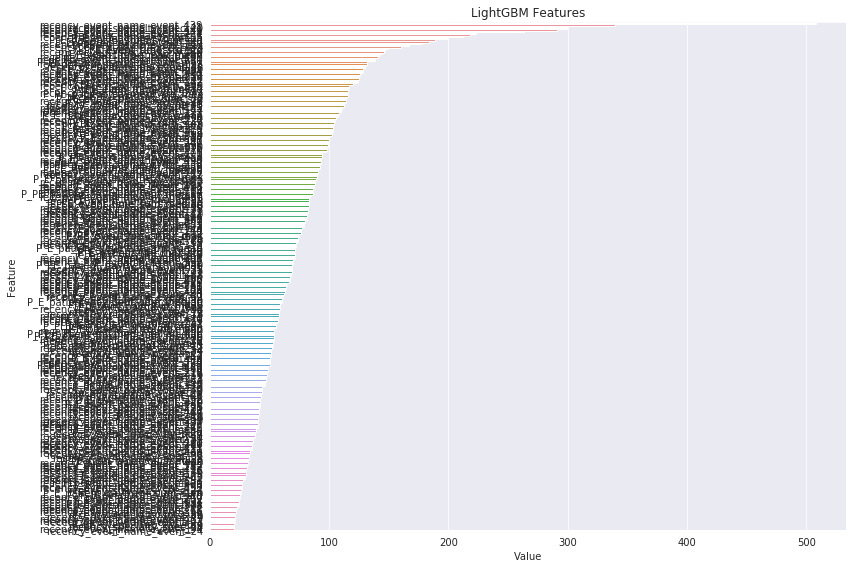

In [36]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_, X.columns), reverse=True)[:300], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [37]:
y_pred_tot=[]
err=[]
feature_importance_df = pd.DataFrame()

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=1500,random_state=1994,learning_rate=0.03,objective='binary',subsample_for_bin=20000,subsample=0.9,reg_alpha=10,reg_lambda=50)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.912027	training's binary_logloss: 0.271902	valid_1's auc: 0.828571	valid_1's binary_logloss: 0.324332
[400]	training's auc: 0.952699	training's binary_logloss: 0.224873	valid_1's auc: 0.833587	valid_1's binary_logloss: 0.31759
[600]	training's auc: 0.974461	training's binary_logloss: 0.192289	valid_1's auc: 0.838148	valid_1's binary_logloss: 0.314066
[800]	training's auc: 0.986851	training's binary_logloss: 0.167341	valid_1's auc: 0.838925	valid_1's binary_logloss: 0.312859
[1000]	training's auc: 0.993054	training's binary_logloss: 0.148411	valid_1's auc: 0.840091	valid_1's binary_logloss: 0.312647
Early stopping, best iteration is:
[921]	training's auc: 0.991073	training's binary_logloss: 0.155201	valid_1's auc: 0.840252	valid_1's binary_logloss: 0.312198
err:  0.840251662462738
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.911561	training's binary_logloss: 0.2

In [38]:
np.mean(err)

0.8349466545260009

In [39]:

df_test['outcome_flag']=np.mean(y_pred_tot,0)
# df_test['outcome_flag']=np.mean(y_pred_tot,0)
df_test.head()

,P_E_event_time_max_max,P_E_event_time_max_mean,P_E_event_time_max_median,P_E_event_time_max_min,P_E_event_time_max_std,P_E_event_time_max_sum,P_E_event_time_mean_max,P_E_event_time_mean_mean,P_E_event_time_mean_median,P_E_event_time_mean_min,...,recency_specialty_spec_242,recency_specialty_spec_100,recency_specialty_spec_234,recency_specialty_spec_213,recency_plan_type_plan_1,recency_plan_type_plan_2,recency_plan_type_plan_3,recency_plan_type_plan_4,recency_plan_type_plan_5,recency_plan_type_plan_6
0,1080,1079.949282,1080,1078,0.313049,1128547,722.953995,507.928213,512.055167,433.022741,...,0.0,0.0,0.0,0.0,15.0,0.0,1034.0,0.0,7.0,0.0
1,1080,1079.863300,1080,1051,1.589821,876849,787.923077,511.028612,508.905211,383.379360,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,73.0,0.0,2.0
2,1080,1079.940000,1080,1078,0.326462,647964,552.739777,507.717790,512.055167,372.986329,...,0.0,0.0,0.0,0.0,18.0,0.0,71.0,0.0,7.0,0.0
3,1080,1079.994671,1080,1079,0.072867,608037,552.739777,503.565487,517.064706,361.044386,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,179.0,0.0,6.0
4,1080,1080.000000,1080,1080,0.000000,401760,553.339144,511.126329,512.055167,459.533133,...,0.0,0.0,0.0,0.0,25.0,0.0,36.0,0.0,7.0,0.0


In [40]:
df_test[['patient_id','outcome_flag']].to_excel('MH-ZS_fork_s10lgb.xlsx',index=False)